#  use the algorithm for a variety of machine learning tasks:

## Detecting abnormal data.
## Clustering text documents.
## Analyzing datasets before you use other classification or regression methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)':'income', 'Age':'age', 'Spending Score (1-100)':'score'}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop('CustomerID',axis=1)

In [7]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.to_csv('new_mall_customers.csv') #save file as csv format 

In [9]:
data = pd.read_csv('new_mall_customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   Gender      200 non-null    object
 2   age         200 non-null    int64 
 3   income      200 non-null    int64 
 4   score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.drop('Unnamed: 0', axis = 1,inplace=True)

In [11]:
data.describe() # descriptive statistics

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [12]:
data.age.std() #standard deviation

13.969007331558883

In [13]:
data.income.max()

137

Text(0.5, 1.0, 'Age - Score')

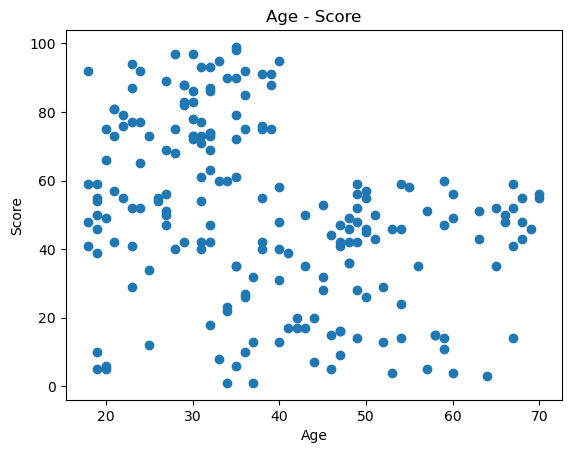

In [14]:
#Visualization  of data 
plt.scatter(data.age, data.score)
plt.xlabel('Age')
plt.ylabel('Score')
plt.title('Age - Score')

Text(0.5, 1.0, 'Income - Score')

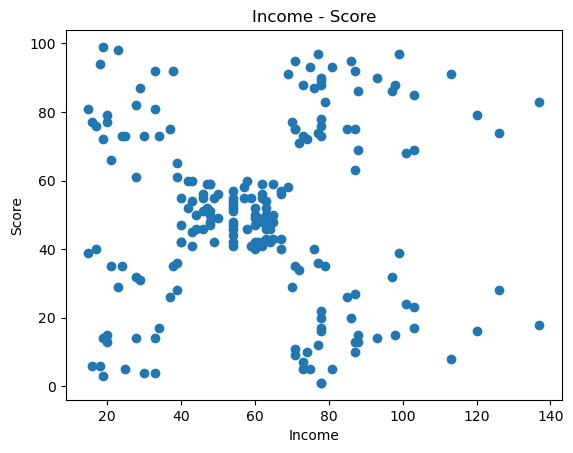

In [15]:
#viz
plt.scatter(data.income, data.score)
plt.xlabel('Income')
plt.ylabel('Score')
plt.title('Income - Score')


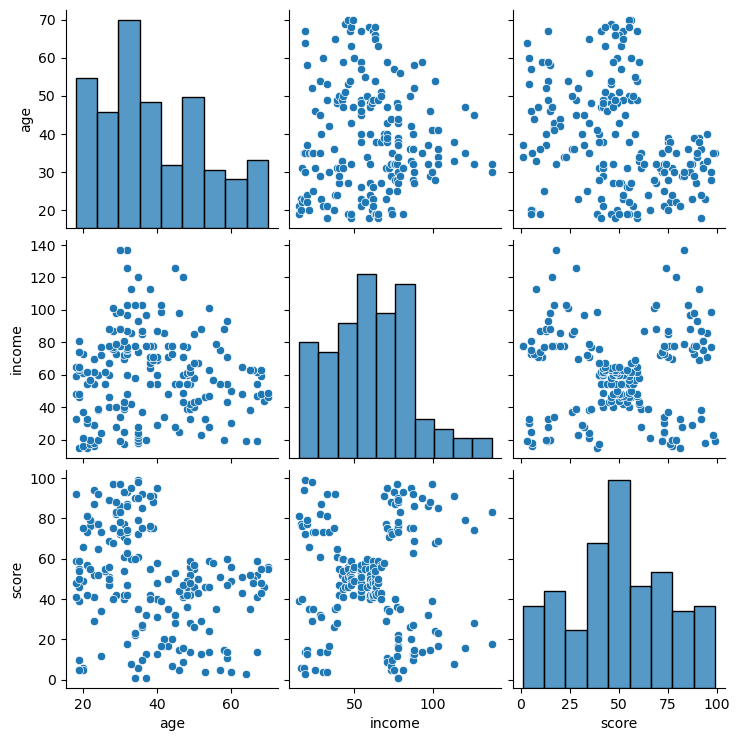

In [16]:
#pairplot
import seaborn as sns
sns.pairplot(data[['age', 'income', 'score']])

# KMeans Cluser Algorithm 

In [33]:
import sklearn.cluster as cluster

In [34]:
kmeans = cluster.KMeans() # default, n_clusters=8 , n_cluster means  

In [35]:
predicted = kmeans.fit_predict(data[['income', 'score']])

In [36]:
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 7, 0, 7, 0, 0, 7, 7, 0, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 6, 5, 7, 5, 6, 5, 6, 5,
       7, 5, 6, 5, 6, 5, 6, 5, 6, 5, 7, 5, 6, 5, 7, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5, 6, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [48]:
data['cluster'] = predicted

In [49]:
'''The centroid is a point that's representative of each cluster. The K-means algorithm assigns each incoming data 
point to one of the clusters by minimizing the within-cluster sum of squares.'''

"The centroid is a point that's representative of each cluster. The K-means algorithm assigns each incoming data \npoint to one of the clusters by minimizing the within-cluster sum of squares."

In [50]:
data.head()

,Gender,age,income,score,cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [51]:
data.columns.values

array(['Gender', 'age', 'income', 'score', 'cluster'], dtype=object)

In [52]:
data2 = data['cluster'].unique()
data2.sort(axis=0)

In [53]:
print('How many unique cluster',data2)

How many unique cluster [0 1 2 3 4 5 6 7]


In [54]:
print("***** Check null values *****")
data.isna().sum()

***** Check null values *****


Gender     0
age        0
income     0
score      0
cluster    0
dtype: int64

In [ ]:
df0 = 

In [55]:
center = kmeans.cluster_centers_ #for finding centriod 

In [56]:
center

array([[ 45.97368421,  51.26315789],
       [109.7       ,  22.        ],
       [108.18181818,  82.72727273],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [ 78.03571429,  81.89285714],
       [ 79.70833333,  14.29166667],
       [ 62.23404255,  47.55319149]])

In [57]:
len(center)

8

In [60]:
df0 = data[data.cluster == 0]
df1 = data[data.cluster == 1]
df2 = data[data.cluster == 2]
df3 = data[data.cluster == 3]
df4 = data[data.cluster == 4]
df5 = data[data.cluster == 5]
df6 = data[data.cluster == 6]
df7 = data[data.cluster == 7]

In [61]:
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(38, 5)
(10, 5)
(11, 5)
(21, 5)
(21, 5)
(28, 5)
(24, 5)
(47, 5)


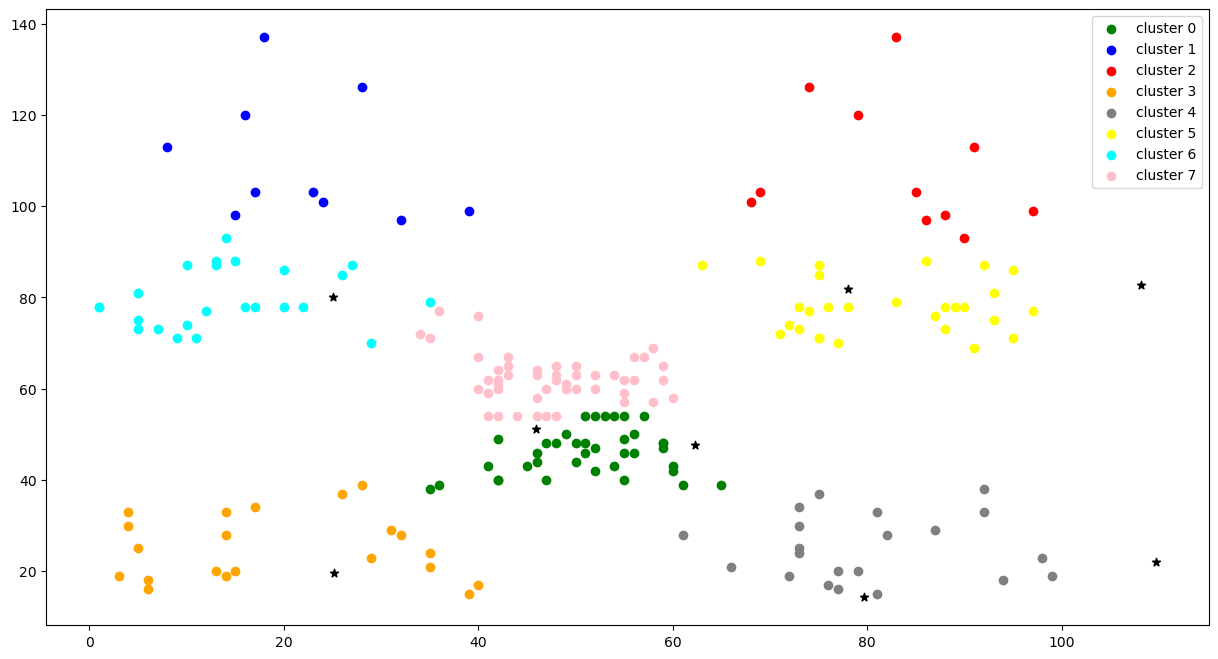

In [62]:
plt.figure(figsize=(15,8))
plt.scatter(df0['score'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['score'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['score'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['score'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['score'], df4['income'], color='gray', label='cluster 4')
plt.scatter(df5['score'], df5['income'], color='yellow', label='cluster 5')
plt.scatter(df6['score'], df6['income'], color='cyan', label='cluster 6')
plt.scatter(df7['score'], df7['income'], color='pink', label='cluster 7')
plt.scatter(center[:,0],center[:,1],color='black',marker='*')
plt.legend()

# Select Optimal Number of Cluster

In [68]:
wcss = [] #sum of square eror
clusters = range(1,11)
for k in clusters:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df[['score','income']])
    wcss.append(km.inertia_)
    

In [69]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25043.97094960722,
 21881.878507060967,
 19649.59658286696]

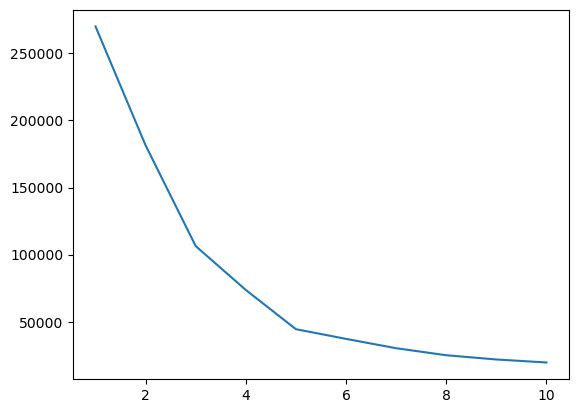

In [70]:
plt.plot(clusters,wcss)

In [72]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [73]:
kn.knee

5

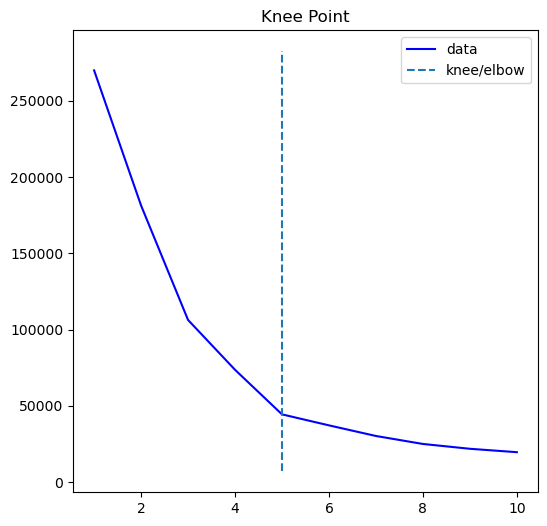

In [75]:
kn.plot_knee()

In [78]:
kmeans2 = cluster.KMeans(n_clusters=5) # default, n_clusters=5
predicted2 = kmeans2.fit_predict(df[['income', 'score']])

In [88]:
data['new_cluster'] = predicted2

In [89]:
data.head()

,Gender,age,income,score,new_cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [96]:
center2 = kmeans2.cluster_centers_
center2

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [97]:
data['new_cluster'].unique()

array([3, 4, 0, 1, 2])

In [98]:
df0 = data[data.new_cluster == 0]
df1 = data[data.new_cluster == 1]
df2 = data[data.new_cluster == 2]
df3 = data[data.new_cluster == 3]
df4 = data[data.new_cluster == 4]

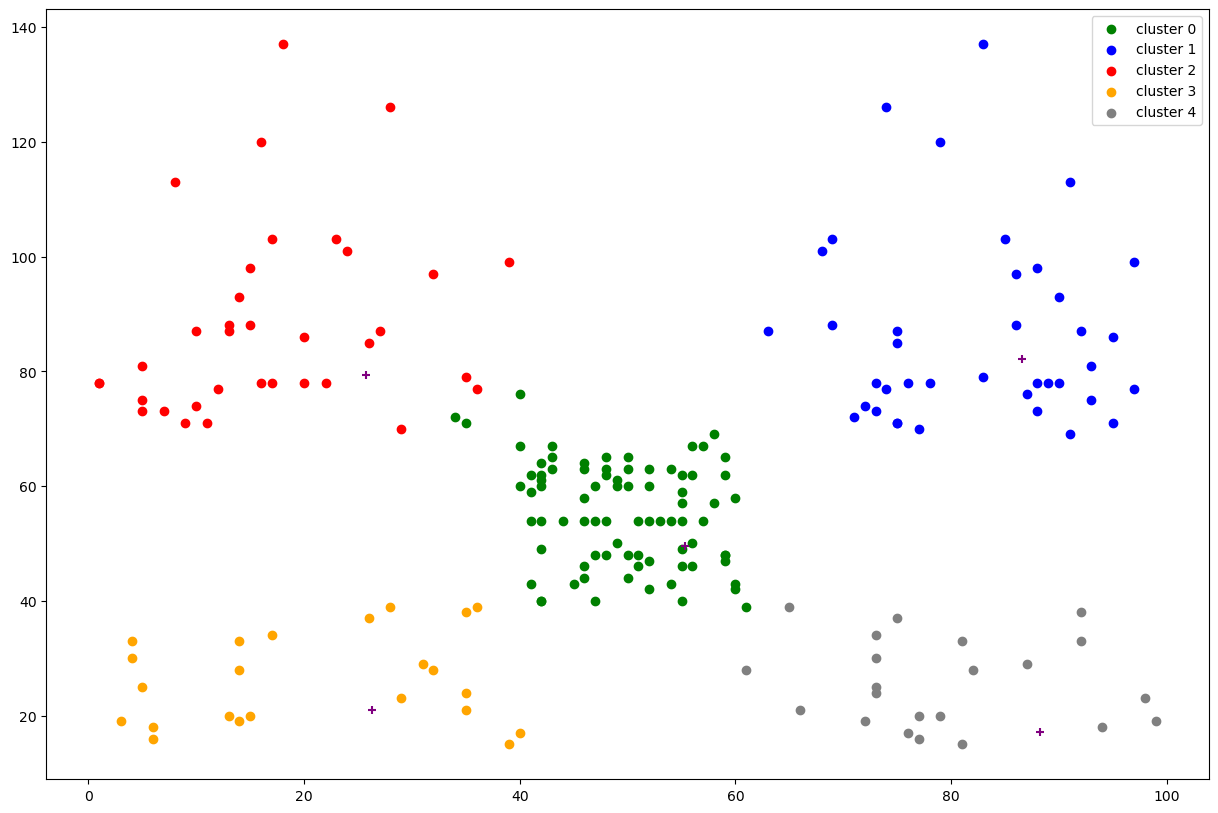

In [99]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['score'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['score'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['score'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['score'], df4['income'], color='gray', label='cluster 4')

plt.scatter(center2[:,0] , center2[:,1], color='purple', marker='+')

plt.legend()

In [100]:
kmeans2.predict([[15,40]])

array([3])